## Image classification with Convolutional Neural Networks

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [21]:
# PATH = "data/dogscats/"
PATH = "data/lta/"
sz=224
arch=vgg16
# bs=64
bs=64

In [22]:
# Uncomment the below if you need to reset your precomputed activations
# !rm -rf {PATH}tmp

In [23]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [24]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [25]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy       
    0      1.006677   0.536753   0.75      



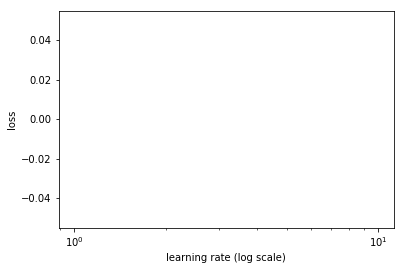

In [26]:
learn.sched.plot()

In [27]:
learn.fit(0.01, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.988321   0.672924   0.65      
    1      0.888928   0.626337   0.75            
    2      0.820333   0.560964   0.85            



[0.5609642, 0.8500000238418579]

In [28]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [29]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [30]:
learn.fit(1e-2, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.937195   0.663239   0.5       
    1      0.790935   0.538      0.8             



[0.53800005, 0.800000011920929]

In [31]:
learn.precompute=False

In [32]:
learn.fit(1e-2, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.691517   0.503743   0.95      



[0.5037428, 0.949999988079071]

In [33]:
learn.unfreeze()

In [34]:
lr=np.array([1e-4,1e-3,1e-2])

In [35]:
learn.fit(lr, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.775084   0.517912   0.95      



[0.51791245, 0.949999988079071]

In [36]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.60923    0.510775   0.8       
    1      0.635757   0.470549   0.75                    
    2      0.567964   0.463529   0.75                    
    3      0.55763    0.412747   0.8                     
    4      0.526771   0.36493    0.85                    
    5      0.511479   0.32997    0.85                    
    6      0.489916   0.313848   0.85                    



[0.31384775, 0.8500000238418579]

In [37]:
learn.fit(lr, 3, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.514133   0.299993   0.9       
    1      0.411669   0.282533   0.95                    
    2      0.410119   0.264591   1.0                     
    3      0.376699   0.251527   0.95                    
    4      0.351611   0.237373   0.95                    
    5      0.362231   0.22752    0.95                    
    6      0.335844   0.201459   0.95                    
    7      0.318797   0.188684   0.95                    
    8      0.302639   0.181405   1.0                     



[0.1814053, 1.0]

In [41]:
learn.fit(lr, 3, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.236159   0.175521   1.0       
    1      0.229209   0.171256   1.0                     
    2      0.229654   0.166559   1.0                     
    3      0.256315   0.144783   0.95                    
    4      0.289871   0.142566   0.95                    
    5      0.300216   0.152983   0.95                    
    6      0.289239   0.152995   0.95                    
    7      0.267002   0.15123    0.95                    
    8      0.260096   0.137877   0.95                    



[0.13787737, 0.949999988079071]

In [42]:
learn.fit(lr, 3, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      0.271227   0.138446   0.95      
    1      0.237821   0.133641   0.95                    
    2      0.228189   0.12797    0.95                    
    3      0.220203   0.125543   0.95                    
    4      0.196649   0.130266   1.0                     
    5      0.184239   0.130166   1.0                     
    6      0.1822     0.115082   0.95                    
    7      0.181076   0.119046   0.95                    
    8      0.170609   0.124677   0.95                    



[0.124677196, 0.949999988079071]

In [56]:
log_preds,y = learn.TTA()
# accuracy(log_preds,y)
accuracy_np(probs,y)

0.95